In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime

In [2]:
df = pd.read_csv("TATASTEEL.csv", index_col='timestamp',parse_dates=True)
df = df.drop(df.columns[0], axis=1)
df.head()

,open,high,low,close,volume
timestamp,,,,,
2021-08-23 14:11:00+05:30,1380.35,1381.00,1379.35,1380.25,15564
2021-08-23 14:12:00+05:30,1380.50,1381.00,1379.25,1379.80,28503
2021-08-23 14:13:00+05:30,1379.80,1380.55,1378.05,1378.80,29879
2021-08-23 14:14:00+05:30,1378.80,1378.80,1377.15,1378.00,16814
2021-08-23 14:15:00+05:30,1378.30,1378.70,1375.35,1376.25,36478


In [3]:
df['SMA_7'] = df['close'].rolling(window=7).mean()
df['SMA_20'] = df['close'].rolling(window=20).mean()
print(df.to_string())

                              open     high      low    close   volume        SMA_7     SMA_20
timestamp                                                                                     
2021-08-23 14:11:00+05:30  1380.35  1381.00  1379.35  1380.25    15564          NaN        NaN
2021-08-23 14:12:00+05:30  1380.50  1381.00  1379.25  1379.80    28503          NaN        NaN
2021-08-23 14:13:00+05:30  1379.80  1380.55  1378.05  1378.80    29879          NaN        NaN
2021-08-23 14:14:00+05:30  1378.80  1378.80  1377.15  1378.00    16814          NaN        NaN
2021-08-23 14:15:00+05:30  1378.30  1378.70  1375.35  1376.25    36478          NaN        NaN
2021-08-23 14:16:00+05:30  1376.20  1377.40  1375.25  1375.85    29114          NaN        NaN
2021-08-23 14:17:00+05:30  1376.05  1377.00  1375.25  1376.05    19369  1377.857143        NaN
2021-08-23 14:18:00+05:30  1376.20  1377.10  1376.00  1376.50    14610  1377.321429        NaN
2021-08-23 14:19:00+05:30  1376.45  1377.00  1376.

## Part (a)

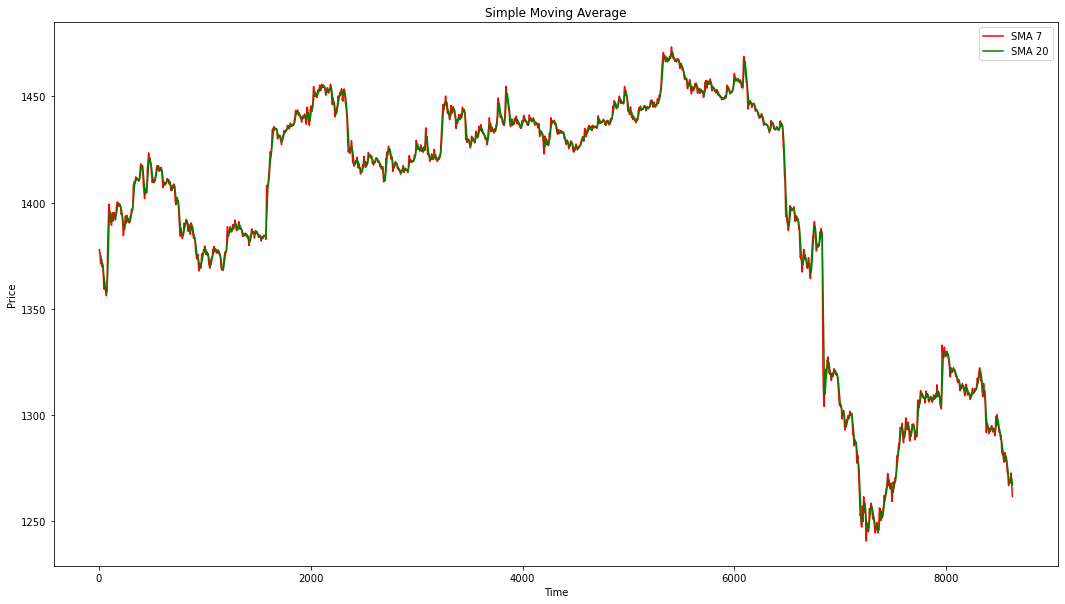

In [4]:
df_plot = df.copy()
df_plot.reset_index(inplace=True)
plt.figure(figsize=(18, 10))
#plt.plot(df_plot['timestamp'],df_plot['SMA_7'], color='r', label='SMA 7')
plt.plot(df_plot['SMA_7'], color='r', label='SMA 7')
#plt.plot(df_plot['timestamp'],df_plot['SMA_20'], color='g', label='SMA 20')
plt.plot(df_plot['SMA_20'], color='g', label='SMA 20')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Simple Moving Average")
plt.legend()
plt.show()

## Part (b)

In [5]:
ohlc = {
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum'
}

df_day = df.resample('1D').apply(ohlc)
time_delta = datetime.timedelta(0,33300)
df_day.reset_index(inplace = True)
df_day['timestamp']=df_day['timestamp']+time_delta
df_day = df_day.set_index('timestamp')
df_day.head()


,open,high,low,close,volume
timestamp,,,,,
2021-08-23 09:15:00+05:30,1380.35,1381.00,1353.65,1362.0,3448748
2021-08-24 09:15:00+05:30,1382.00,1420.00,1377.00,1407.0,17510590
2021-08-25 09:15:00+05:30,1418.00,1425.80,1381.00,1390.6,12499848
2021-08-26 09:15:00+05:30,1390.40,1394.65,1365.15,1376.8,9138125
2021-08-27 09:15:00+05:30,1379.00,1394.45,1376.25,1382.1,7370791


In [6]:
df_day['PP'] = (df_day['high'].shift(1)+df_day['low'].shift(1)+df_day['close'].shift(1))/3
df_day['R1'] = df_day['PP']*2 - df_day['low'].shift(1)
df_day['S1'] = df_day['PP']*2 - df_day['high'].shift(1)
df_day = df_day.drop(columns=['open', 'high', 'low', 'close', 'volume'])
df_day.head()

,PP,R1,S1
timestamp,,,
2021-08-23 09:15:00+05:30,NaN,NaN,NaN
2021-08-24 09:15:00+05:30,1365.550000,1377.450000,1350.100000
2021-08-25 09:15:00+05:30,1401.333333,1425.666667,1382.666667
2021-08-26 09:15:00+05:30,1399.133333,1417.266667,1372.466667
2021-08-27 09:15:00+05:30,1378.866667,1392.583333,1363.083333


In [7]:
df_new = df.join(df_day, on='timestamp')
df_new = df_new.fillna(method='ffill')
df_new = df_new.fillna(method='bfill')
df_new

,open,high,low,close,volume,SMA_7,SMA_20,PP,R1,S1
timestamp,,,,,,,,,,
2021-08-23 14:11:00+05:30,1380.35,1381.00,1379.35,1380.25,15564,1377.857143,1375.0500,1365.550000,1377.450000,1350.100000
2021-08-23 14:12:00+05:30,1380.50,1381.00,1379.25,1379.80,28503,1377.857143,1375.0500,1365.550000,1377.450000,1350.100000
2021-08-23 14:13:00+05:30,1379.80,1380.55,1378.05,1378.80,29879,1377.857143,1375.0500,1365.550000,1377.450000,1350.100000
2021-08-23 14:14:00+05:30,1378.80,1378.80,1377.15,1378.00,16814,1377.857143,1375.0500,1365.550000,1377.450000,1350.100000
2021-08-23 14:15:00+05:30,1378.30,1378.70,1375.35,1376.25,36478,1377.857143,1375.0500,1365.550000,1377.450000,1350.100000
...,...,...,...,...,...,...,...,...,...,...
2021-09-24 14:06:00+05:30,1261.95,1262.70,1260.00,1260.15,65604,1265.042857,1269.1025,1320.266667,1334.083333,1301.533333
2021-09-24 14:07:00+05:30,1260.15,1261.00,1259.05,1259.70,107859,1263.814286,1268.6350,1320.266667,1334.083333,1301.533333
2021-09-24 14:08:00+05:30,1259.95,1260.35,1258.45,1259.95,54899,1262.571429,1268.2050,1320.266667,1334.083333,1301.533333


In [8]:
profit = 0
entryflag = 0
for i, r in df_new.iterrows():
    if r["close"] > r["S1"] and r["close"] > r["SMA_20"] and entryflag == 0:
        entry = r['close']
        entryflag = 1

    elif r["close"] < r["S1"] and r["close"] < r["SMA_20"] and entryflag == 1:
        exit = r['close']
        entryflag = 0
        print(exit - entry)
        profit = profit + exit - entry
    else:
        pass
print("Profit/Loss of the entire backtest: ", profit)

1.5499999999999545
-14.299999999999955
-5.2000000000000455
-5.25
-1.75
57.15000000000009
6.0
17.0
-4.349999999999909
-2.7999999999999545
-1.25
46.65000000000009
-5.5499999999999545
Profit/Loss of the entire backtest:  87.90000000000032


## Part (c)

In [9]:
profit = 0
entryflag = 0
for i, r in df_new.iterrows():
    if r["close"] > r["S1"] and r["close"] > r["SMA_20"] and entryflag == 0:
        entry = r['close']
        entryflag = 1

    if r["close"] < r["S1"] and r["close"] < r["SMA_20"] and entryflag == 1:
        exit = r['close']
        entryflag = 0
        print(exit - entry)
        profit = profit + exit - entry
    elif r["close"] > 1.01*entry and entryflag == 1:# Target
        exit = r['close']
        entryflag = 0
        print(exit - entry)
        profit = profit + exit - entry
    elif r["close"] < 0.995*entry and entryflag == 1:# Stoploss
        exit = r['close']
        entryflag = 0
        print(exit - entry)
        profit = profit + exit - entry
    else:
        pass
    
print("Profit/Loss of the entire backtest: ", profit)

-8.75
-7.0499999999999545
23.75
15.849999999999909
-7.099999999999909
-7.650000000000091
15.400000000000091
14.450000000000045
-7.150000000000091
-8.400000000000091
-9.75
-8.099999999999909
-7.2000000000000455
-7.099999999999909
-5.2000000000000455
-5.25
-1.75
19.09999999999991
-8.25
28.09999999999991
17.15000000000009
14.5
-7.9500000000000455
15.299999999999955
-7.7999999999999545
-8.299999999999955
-12.449999999999818
16.09999999999991
-8.950000000000045
-7.5
15.450000000000045
14.650000000000091
-7.400000000000091
-7.2999999999999545
-9.650000000000091
16.0
-7.5
16.450000000000045
-7.7999999999999545
-7.7000000000000455
-7.850000000000136
15.0
-7.649999999999864
-8.799999999999955
14.849999999999909
14.549999999999955
-8.25
17.25
-8.149999999999864
-10.200000000000045
16.100000000000136
-7.4500000000000455
-4.349999999999909
-2.7999999999999545
-1.25
17.950000000000045
-7.300000000000182
13.25
-7.4500000000000455
-6.5
-7.0499999999999545
13.599999999999909
-7.5
16.200000000000045
14

## Part (d)

In [10]:
mkt_open = datetime.time(9,25)
mkt_close = datetime.time(15,15)

In [11]:
profit = 0
flag = 0
entryflag = 0
for i, r in df_new.iterrows():
    if i.time() == mkt_open:
        flag = 1
    elif i.time() == mkt_close:
        flag = 0
    else:
        pass
    if flag == 1:
        if entryflag == 0:
            if r["close"] > r["S1"] and r["close"] > r["SMA_20"]:
                entry = r['close']
                entryflag = 1
        elif entryflag == 1:
            if r["close"] < r["S1"] and r["close"] < r["SMA_20"]:
                exit = r['close']
                entryflag = 0
                print(exit - entry)
                profit = profit + exit - entry
            elif r["close"] > 1.01*entry:# Target
                exit = r['close']
                entryflag = 0
                print(exit - entry)
                profit = profit + exit - entry
            elif r["close"] < 0.995*entry:# Stoploss
                exit = r['close']
                entryflag = 0
                print(exit - entry)
                profit = profit + exit - entry
            else:
                pass
    elif flag == 0 and entryflag == 1:
        exit = r['close']
        entryflag =0
        print(exit-entry)
        profit = profit+exit-entry
    else:
        pass
    
print("Profit/Loss of the entire backtest: ", profit)

-7.2000000000000455
15.400000000000091
-2.5499999999999545
-10.200000000000045
-8.400000000000091
-9.75
-8.099999999999909
-7.2000000000000455
3.7999999999999545
-7.4500000000000455
-7.650000000000091
-5.2000000000000455
-5.25
-1.75
3.5499999999999545
-7.4500000000000455
2.2999999999999545
14.25
14.75
-8.349999999999909
15.399999999999864
-1.9500000000000455
-8.099999999999909
15.149999999999864
-7.7000000000000455
-8.299999999999955
11.650000000000091
-7.399999999999864
7.75
-7.449999999999818
15.450000000000045
14.650000000000091
-7.400000000000091
-7.2999999999999545
4.0
16.0
-7.5
-3.5
-7.650000000000091
-7.400000000000091
-7.7000000000000455
-1.75
4.0
14.599999999999909
-1.7999999999999545
-7.400000000000091
17.25
2.900000000000091
-7.4500000000000455
-8.900000000000091
-8.100000000000136
-1.2999999999999545
0.0
-8.349999999999909
-4.349999999999909
-2.7999999999999545
-1.25
-8.050000000000182
-7.599999999999909
-7.0499999999999545
13.599999999999909
-7.5
16.200000000000045
14.5499